One of the most compelling stories of sports analytics made popular by the 2011 movie Moneyball, the Oakland Athletics team of 2002 created history by winning 20 consecutive games between August 13 and September 2002.
Much of the Oakland Athletics (popularly referred to as the A’s) success in that season is attributed to their General Manager, Billy Beane and former Assistant General Manager, Paul DePodesta.

DePodesta, a graduate in Economics from Harvard University joined the A’s in 1999 and quickly started incorporating analysis of baseball statistics to value and purchase players.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install pycaret

Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'error'


  ERROR: Command errored out with exit status 2:
   command: 'C:\ProgramData\Anaconda3\python.exe' 'C:\Users\Admin\AppData\Local\Temp\pip-standalone-pip-_frnwz_1\__env_pip__.zip\pip' install --ignore-installed --no-user --prefix 'C:\Users\Admin\AppData\Local\Temp\pip-build-env-omz0v_t3\overlay' --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- setuptools wheel 'Cython>=0.28.5' 'numpy==1.13.3; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"' and platform_python_implementation == '"'"'CPython'"'"'' 'numpy==1.14.0; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"' and platform_python_implementation != '"'"'CPython'"'"'' 'numpy==1.14.5; python_version=='"'"'3.7'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.17.3; python_version>='"'"'3.8'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.6'"'"' and platform_system=='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.7'"'"' and pl

Defaulting to user installation because normal site-packages is not writeable
  Using cached pycaret-2.3.10-py3-none-any.whl (320 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "C:\ProgramData\Anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\ProgramData\Anaconda3\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "C:\ProgramData\Anaconda3\lib\ssl.py", line 1099, in read
    return self._sslobj.read(len, buffer)
Con

In [ ]:
#RA - Runs Allowed
#RS - Runs Scored
#OBP - On Base Percentage
#SLG - Slugging Percentage
#BA - Batting Average
#OOBP - Opponent's OBP
#OSLG - Opponent's SLG
#W - No of wins in that season
#Statistical Analysis Clip from Moneyball (2011)

In [3]:
df=pd.read_csv('baseball.csv')
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [39]:
df=pd.read_csv('/content/drive/My Drive/Case Studies Mahesh Anand/baseball.csv')
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [40]:
df.shape

(1232, 15)

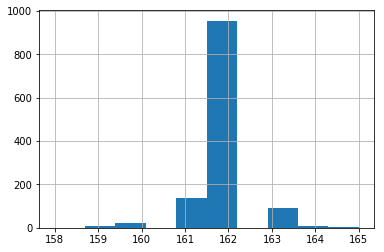

In [ ]:
df['G'].hist()

In [6]:
df.corr()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
Year,1.000000,0.418978,0.412020,0.004138,0.374354,0.536037,0.349397,0.145779,0.385219,0.443967,0.009287,-0.371869,-0.345667
RS,0.418978,1.000000,0.380139,0.511745,0.900492,0.918740,0.827000,0.386628,-0.027687,0.210963,0.075195,0.133981,0.193426
RA,0.412020,0.380139,1.000000,-0.532394,0.326360,0.436527,0.330764,-0.261477,0.399141,0.315128,-0.023369,0.910344,0.909319
W,0.004138,0.511745,-0.532394,1.000000,0.481836,0.401496,0.408716,0.616757,-0.755098,-0.198960,0.105309,-0.634315,-0.568490
OBP,0.374354,0.900492,0.326360,0.481836,1.000000,0.790910,0.851958,0.363890,0.001612,0.175349,0.016563,0.120349,0.153372
SLG,0.536037,0.918740,0.436527,0.401496,0.790910,1.000000,0.790481,0.324713,0.126663,0.271893,0.036770,0.143861,0.210423
BA,0.349397,0.827000,0.330764,0.408716,0.851958,0.790481,1.000000,0.290217,0.035452,0.092684,0.019886,0.187108,0.227808
Playoffs,0.145779,0.386628,-0.261477,0.616757,0.363890,0.324713,0.290217,1.000000,NaN,NaN,0.022208,-0.433572,-0.366744
RankSeason,0.385219,-0.027687,0.399141,-0.755098,0.001612,0.126663,0.035452,NaN,1.000000,0.266906,0.069222,0.097731,0.050111
RankPlayoffs,0.443967,0.210963,0.315128,-0.198960,0.175349,0.271893,0.092684,NaN,0.266906,1.000000,0.007820,0.065808,0.087089


In [4]:
df1=df[df['Year']<2002]

In [5]:
df1.shape

(902, 15)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 330 to 1231
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          902 non-null    object 
 1   League        902 non-null    object 
 2   Year          902 non-null    int64  
 3   RS            902 non-null    int64  
 4   RA            902 non-null    int64  
 5   W             902 non-null    int64  
 6   OBP           902 non-null    float64
 7   SLG           902 non-null    float64
 8   BA            902 non-null    float64
 9   Playoffs      902 non-null    int64  
 10  RankSeason    154 non-null    float64
 11  RankPlayoffs  154 non-null    float64
 12  G             902 non-null    int64  
 13  OOBP          90 non-null     float64
 14  OSLG          90 non-null     float64
dtypes: float64(7), int64(6), object(2)
memory usage: 112.8+ KB


In [6]:
X=df1[['OBP','SLG','OOBP','OSLG']]
Y=df1['W']

In [7]:
X['OOBP'].fillna(value=X['OOBP'].median(),inplace=True)
X['OSLG'].fillna(value=X['OSLG'].median(),inplace=True)

In [8]:
import statsmodels.api as sm

In [9]:
xc=sm.add_constant(X)
model=sm.OLS(Y,xc).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     84.22
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           9.56e-61
Time:                        13:53:19   Log-Likelihood:                -3331.0
No. Observations:                 902   AIC:                             6672.
Df Residuals:                     897   BIC:                             6696.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        125.8605     24.109      5.221      0.000      78.544     173.177
OBP          304.5758     35.676      8.537      0.000     234.558     374.594
SLG           26.1920     16.604      1.577      0.115      -6.394      58.778
OOBP        -188.9933    109.679     -1.723      0.085    -404.251      26.264
OSLG        -207.1056     66.222     -3.127      0.002    -337.075     -77.137
==============================================================================
Omnibus:                        2.793   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.247   Jarque-Bera (JB):                2.471
Skew:                           0.041   Prob(JB):                        0.291
Kurtosis:                       2.757   Cond. No.                         476.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
df['RD']=df['RS']-df['RA']
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,46
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,100
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403,7
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428,-72
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424,-146


In [12]:
df.shape

(1232, 16)

In [13]:
df.corr()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
Year,1.000000e+00,0.418978,0.412020,0.004138,0.374354,0.536037,0.349397,0.145779,0.385219,0.443967,0.009287,-0.371869,-0.345667,-1.144684e-16
RS,4.189775e-01,1.000000,0.380139,0.511745,0.900492,0.918740,0.827000,0.386628,-0.027687,0.210963,0.075195,0.133981,0.193426,5.462938e-01
RA,4.120202e-01,0.380139,1.000000,-0.532394,0.326360,0.436527,0.330764,-0.261477,0.399141,0.315128,-0.023369,0.910344,0.909319,-5.670477e-01
W,4.138248e-03,0.511745,-0.532394,1.000000,0.481836,0.401496,0.408716,0.616757,-0.755098,-0.198960,0.105309,-0.634315,-0.568490,9.378511e-01
OBP,3.743545e-01,0.900492,0.326360,0.481836,1.000000,0.790910,0.851958,0.363890,0.001612,0.175349,0.016563,0.120349,0.153372,5.063794e-01
SLG,5.360371e-01,0.918740,0.436527,0.401496,0.790910,1.000000,0.790481,0.324713,0.126663,0.271893,0.036770,0.143861,0.210423,4.228647e-01
BA,3.493972e-01,0.827000,0.330764,0.408716,0.851958,0.790481,1.000000,0.290217,0.035452,0.092684,0.019886,0.187108,0.227808,4.369427e-01
Playoffs,1.457787e-01,0.386628,-0.261477,0.616757,0.363890,0.324713,0.290217,1.000000,NaN,NaN,0.022208,-0.433572,-0.366744,5.810944e-01
RankSeason,3.852191e-01,-0.027687,0.399141,-0.755098,0.001612,0.126663,0.035452,NaN,1.000000,0.266906,0.069222,0.097731,0.050111,-5.806451e-01
RankPlayoffs,4.439670e-01,0.210963,0.315128,-0.198960,0.175349,0.271893,0.092684,NaN,0.266906,1.000000,0.007820,0.065808,0.087089,-1.312351e-01


In [14]:
#To replicate the data prior to 2002 season
df1=df[df['Year']<2002]
df1.shape

(902, 16)

In [15]:
df1.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,86
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439,-142
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393,27


In [16]:
df_new=df1.drop(['Team','League','Year','Playoffs','RankSeason','RankPlayoffs'],axis=1)
df_new.head()

,RS,RA,W,OBP,SLG,BA,G,OOBP,OSLG,RD
330,691,730,75,0.327,0.405,0.261,162,0.331,0.412,-39
331,818,677,92,0.341,0.442,0.267,162,0.311,0.404,141
332,729,643,88,0.324,0.412,0.260,162,0.314,0.384,86
333,687,829,63,0.319,0.380,0.248,162,0.337,0.439,-142
334,772,745,82,0.334,0.439,0.266,161,0.329,0.393,27


In [ ]:
df_new.shape

(902, 10)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 330 to 1231
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RS      902 non-null    int64  
 1   RA      902 non-null    int64  
 2   W       902 non-null    int64  
 3   OBP     902 non-null    float64
 4   SLG     902 non-null    float64
 5   BA      902 non-null    float64
 6   G       902 non-null    int64  
 7   OOBP    90 non-null     float64
 8   OSLG    90 non-null     float64
 9   RD      902 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 77.5 KB


In [17]:
df1.corr()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
Year,1.000000e+00,0.485502,0.483072,0.002756,0.474799,0.517828,0.438729,0.113014,0.415645,0.426403,-0.027085,-0.335533,-0.122668,-7.276869e-16
RS,4.855023e-01,1.000000,0.415014,0.507382,0.904909,0.926384,0.831625,0.371631,0.135743,0.323624,0.056206,0.091057,0.039787,5.375395e-01
RA,4.830717e-01,0.415014,1.000000,-0.507772,0.367105,0.459514,0.350411,-0.241213,0.539387,0.382416,-0.037402,0.909908,0.895110,-5.441052e-01
W,2.755645e-03,0.507382,-0.507772,1.000000,0.474080,0.405972,0.416391,0.588978,-0.747960,-0.235038,0.108128,-0.633657,-0.646920,9.385150e-01
OBP,4.747989e-01,0.904909,0.367105,0.474080,1.000000,0.806154,0.854055,0.345530,0.146153,0.300446,-0.003827,0.052899,-0.008316,4.942505e-01
SLG,5.178276e-01,0.926384,0.459514,0.405972,0.806154,1.000000,0.814068,0.300191,0.217315,0.341013,0.012873,0.101632,0.080376,4.284077e-01
BA,4.387291e-01,0.831625,0.350411,0.416391,0.854055,0.814068,1.000000,0.278772,0.156881,0.229791,-0.001805,0.219021,0.231918,4.421417e-01
Playoffs,1.130136e-01,0.371631,-0.241213,0.588978,0.345530,0.300191,0.278772,1.000000,NaN,NaN,0.009831,-0.495725,-0.510097,5.662745e-01
RankSeason,4.156449e-01,0.135743,0.539387,-0.747960,0.146153,0.217315,0.156881,NaN,1.000000,0.352961,0.052870,0.141905,0.235886,-5.703690e-01
RankPlayoffs,4.264030e-01,0.323624,0.382416,-0.235038,0.300446,0.341013,0.229791,NaN,0.352961,1.000000,0.012394,0.299376,0.318576,-7.677988e-02


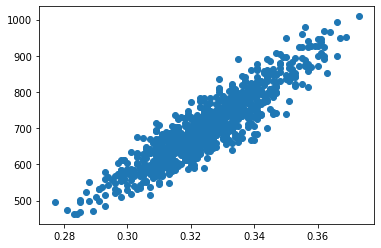

In [ ]:
plt.scatter(df1['OBP'],df1['RS'])

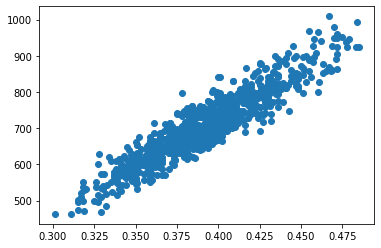

In [ ]:
plt.scatter(df1['SLG'],df1['RS'])

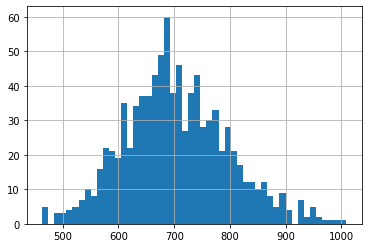

In [ ]:
#find insights regarding the distributions of the numerical variables
df1['RS'].hist(bins=50)

In [ ]:
df1['RS'].skew()

0.29951280844941525

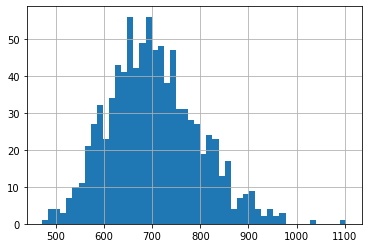

In [ ]:
df1['RA'].hist(bins=50)

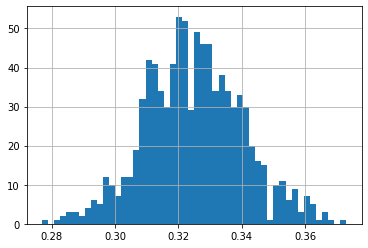

In [ ]:
df1['OBP'].hist(bins=50)

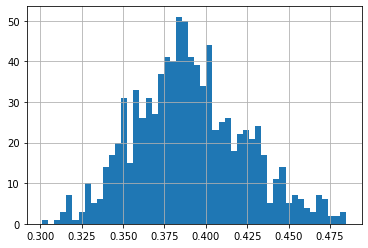

In [ ]:
df1['SLG'].hist(bins=50)

In [11]:
df_playoff=df1.groupby('Playoffs')
df_playoff_0=df_playoff.get_group(0)
df_playoff_1=df_playoff.get_group(1)

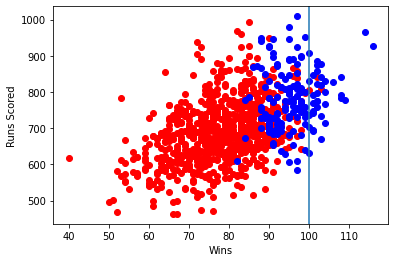

In [14]:
# Plotting scatterplotplt.
#figure(figsize=(10,8))
plt.scatter(x=df_playoff_0.W,y = df_playoff_0.RS,c="red")
plt.scatter(x=df_playoff_1.W,y = df_playoff_1.RS,c="blue")
plt.xlabel("Wins")
plt.ylabel("Runs Scored")
plt.axvline(x = 100)

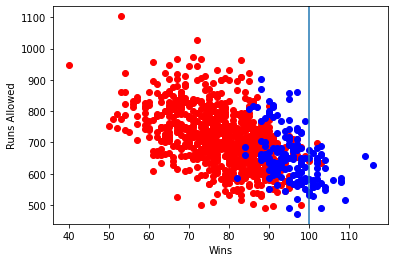

In [15]:
# Plotting scatterplotplt.
#figure(figsize=(10,8))
plt.scatter(x=df_playoff_0.W,y = df_playoff_0.RA,c="red")
plt.scatter(x=df_playoff_1.W,y = df_playoff_1.RA,c="blue")
plt.xlabel("Wins")
plt.ylabel("Runs Allowed")
plt.axvline(x = 100)

From the above plot we see that DePodesta’s estimate of 99 wins makes sense since there appears to be only 3 observations (red) who haven’t made it to the playoffs with ≥ 99 wins.

DePodesta also calculated that the A’s need to score atleast 814 runs and allow only 645 runs in order to make it to the postseason. That meant that the difference between runs scored and runs allowed needed to be approximately 169(RD). Let us look at the relationship between RD and Wins.

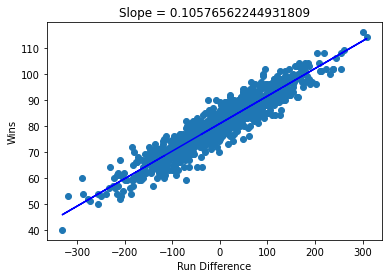

In [ ]:
#figure(figsize=(10,8))
x = np.array(df1.RD)
y = np.array(df1.W)# Deriving slope,intercept values
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]#Plotting the figureplt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Run Difference")
plt.ylabel("Wins")
plt.show()

In [ ]:
print(np.corrcoef(x,y))

[[1.         0.93851498]
 [0.93851498 1.        ]]


In [ ]:
#https://en.wikipedia.org/wiki/On-base_percentage
#Batting Average = Hits/At Bat

OBP, SLG and AVG are strong indicators of runs scored by the particular team.
Let us validate these assumptions by plotting the relationship between each of these variables with RS(Runs scored)

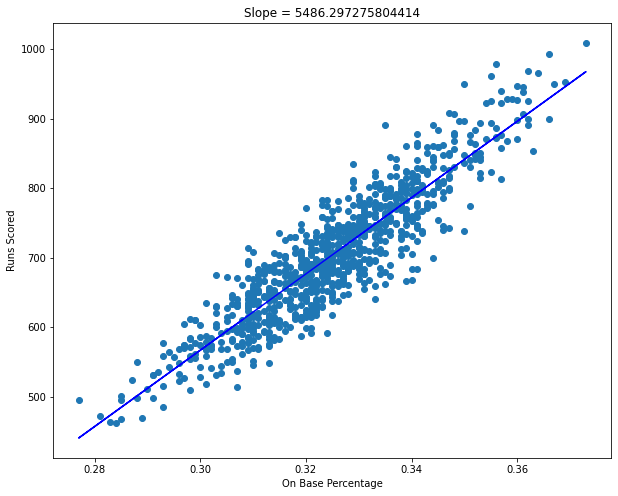

In [ ]:
plt.figure(figsize=(10,8))
x = np.array(df1.OBP)
y = np.array(df1.RS)# Deriving slope,intercept values
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]#Plotting the figureplt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("On Base Percentage")
plt.ylabel("Runs Scored")
plt.show()

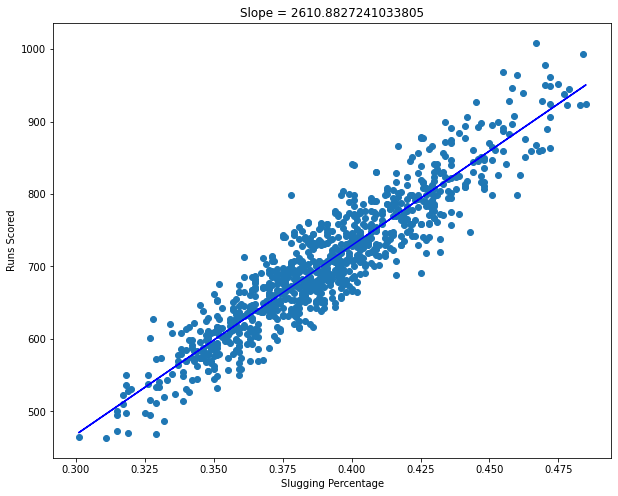

In [ ]:
plt.figure(figsize=(10,8))
x = np.array(df1.SLG)
y = np.array(df1.RS)# Deriving slope,intercept values
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]#Plotting the figureplt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Slugging Percentage")
plt.ylabel("Runs Scored")
plt.show()

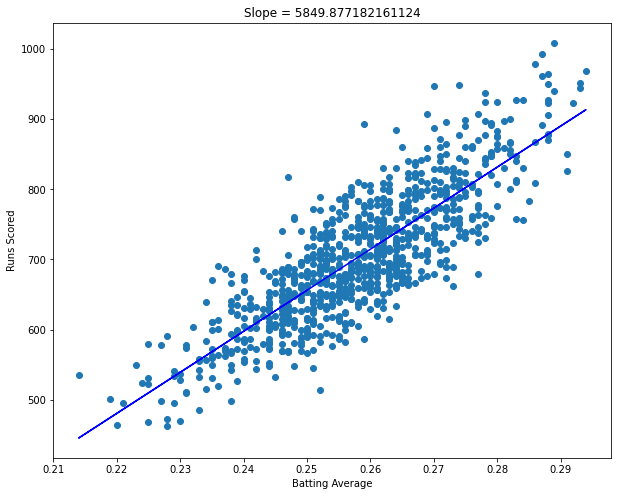

In [ ]:
plt.figure(figsize=(10,8))
x = np.array(df1.BA)
y = np.array(df1.RS)# Deriving slope,intercept values
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]#Plotting the figureplt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Batting Average")
plt.ylabel("Runs Scored")
plt.show()

In [ ]:
print(np.corrcoef(df1.OBP,df1.RS))

[[1.         0.90490915]
 [0.90490915 1.        ]]


In [ ]:
print(np.corrcoef(df1.SLG,df1.RS))

[[1.         0.92638433]
 [0.92638433 1.        ]]


In [ ]:
print(np.corrcoef(df1.BA,df1.RS))

[[1.         0.83162475]
 [0.83162475 1.        ]]


Similarly, we can hypothesise that OOBP(Opponent’s OBP) and OSLG(Opponent’s SLG) have a similar relationship with RA(Runs allowed).

DATA CLEANING: There are a few missing values in the OOBP and OSLG columns. We have to remove these rows of observations in order to plot a proper relationship

In [16]:
df1.shape

(902, 16)

In [ ]:
#random sampling imputation
#for col in df1.columns:
  #df1[col]=df1[col].fillna(df1[col].dropna().sample(random_state=0).iloc[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df1['OOBP'].median()
df1['OSLG'].median()

0.4325

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 330 to 1231
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RS      902 non-null    int64  
 1   RA      902 non-null    int64  
 2   W       902 non-null    int64  
 3   OBP     902 non-null    float64
 4   SLG     902 non-null    float64
 5   BA      902 non-null    float64
 6   G       902 non-null    int64  
 7   OOBP    902 non-null    float64
 8   OSLG    902 non-null    float64
 9   RD      902 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 77.5 KB


In [ ]:
#Median Imputation
df_new['OOBP'].fillna(value=df_new['OOBP'].median(),inplace=True)
df_new['OSLG'].fillna(value=df_new['OSLG'].median(),inplace=True)

In [ ]:
from sklearn.impute import KNNImputer
Imp=KNNImputer(n_neighbors=4)
df_final=Imp.fit_transform(df_new)

In [ ]:
df_final.shape

(902, 10)

In [ ]:
df_final=pd.DataFrame(df_final)
df_final.head()

,0,1,2,3,4,5,6,7,8,9
0,691.0,730.0,75.0,0.327,0.405,0.261,162.0,0.331,0.412,-39.0
1,818.0,677.0,92.0,0.341,0.442,0.267,162.0,0.311,0.404,141.0
2,729.0,643.0,88.0,0.324,0.412,0.260,162.0,0.314,0.384,86.0
3,687.0,829.0,63.0,0.319,0.380,0.248,162.0,0.337,0.439,-142.0
4,772.0,745.0,82.0,0.334,0.439,0.266,161.0,0.329,0.393,27.0


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       902 non-null    float64
 1   1       902 non-null    float64
 2   2       902 non-null    float64
 3   3       902 non-null    float64
 4   4       902 non-null    float64
 5   5       902 non-null    float64
 6   6       902 non-null    float64
 7   7       902 non-null    float64
 8   8       902 non-null    float64
 9   9       902 non-null    float64
dtypes: float64(10)
memory usage: 70.6 KB


In [ ]:
df_final.columns=df_new.columns
df_final.head()

,RS,RA,W,OBP,SLG,BA,G,OOBP,OSLG,RD
0,691.0,730.0,75.0,0.327,0.405,0.261,162.0,0.331,0.412,-39.0
1,818.0,677.0,92.0,0.341,0.442,0.267,162.0,0.311,0.404,141.0
2,729.0,643.0,88.0,0.324,0.412,0.260,162.0,0.314,0.384,86.0
3,687.0,829.0,63.0,0.319,0.380,0.248,162.0,0.337,0.439,-142.0
4,772.0,745.0,82.0,0.334,0.439,0.266,161.0,0.329,0.393,27.0


In [44]:
df2=df_new.dropna()

In [45]:
df2.shape

(90, 10)

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 330 to 419
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RS      90 non-null     int64  
 1   RA      90 non-null     int64  
 2   W       90 non-null     int64  
 3   OBP     90 non-null     float64
 4   SLG     90 non-null     float64
 5   BA      90 non-null     float64
 6   G       90 non-null     int64  
 7   OOBP    90 non-null     float64
 8   OSLG    90 non-null     float64
 9   RD      90 non-null     int64  
dtypes: float64(5), int64(5)
memory usage: 7.7 KB


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 330 to 1231
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RS      902 non-null    int64  
 1   RA      902 non-null    int64  
 2   W       902 non-null    int64  
 3   OBP     902 non-null    float64
 4   SLG     902 non-null    float64
 5   BA      902 non-null    float64
 6   G       902 non-null    int64  
 7   OOBP    902 non-null    float64
 8   OSLG    902 non-null    float64
 9   RD      902 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 77.5 KB


Our first model is used to predict ‘runs scored’. Our independent variables as on-base percentage, slugging percentage, batting average.

In [47]:
from sklearn.linear_model import LinearRegression
# Extracting our variables from the dataframe.
x = df2[['OBP','SLG']].values
y = df2[['RS']].values# Calling our model object.
RS_model = LinearRegression()# Fitting the model.
RS_model.fit(x,y)
# Printing model intercept and coefficients.
print(RS_model.intercept_)
print(RS_model.coef_)

[-1014.01832371]
[[3562.39402674 1412.56993192]]


In [ ]:
x.shape

(902, 2)

Thus, our model is of the following form:

RS = -804.63+2737.77×(OBP)+1584.91×(SLG)

Similarly, we build a model for ‘runs allowed’ using opponent’s on-base percentage and opponent’s slugging percentage as independent variables:

In [48]:
# Extracting our variables from the dataframe.
x = df2[['OOBP','OSLG']].values
y = df2[['RA']].values# Calling our model object.
RA_model = LinearRegression()# Fitting the model.
RA_model.fit(x,y)# Printing model intercept and coefficients.
print(RA_model.intercept_)
print(RA_model.coef_)

[-837.37788861]
[[2913.59948582 1514.28595842]]


In [ ]:
df2.head()

,RS,RA,W,OBP,SLG,BA,G,OOBP,OSLG
330,691,730,75,0.327,0.405,0.261,162,0.331,0.412
331,818,677,92,0.341,0.442,0.267,162,0.311,0.404
332,729,643,88,0.324,0.412,0.260,162,0.314,0.384
333,687,829,63,0.319,0.380,0.248,162,0.337,0.439
334,772,745,82,0.334,0.439,0.266,161,0.329,0.393


model for predicting wins from runs difference:

In [49]:
# Extracting our variables from the dataframe.
x = df2[['RD']].values
y = df2[['W']].values# Calling our model object.
W_model = LinearRegression()# Fitting the model.
W_model.fit(x,y)# Printing model intercept and coefficients.
print(W_model.intercept_)
print(W_model.coef_)

[80.92222222]
[[0.09918986]]


Model Predictions

Here are the Oakland Athletics statistics in 2001 before the playoffs.

OBP: 0.339

SLG: 0.430

OOBP: 0.307

OSLG: 0.373
Lets plug in these values into the above models to generate predictions.

In [50]:
# Prediction for runs scored.
RS_model.predict([[0.339,0.430]])

array([[801.03832208]])

In [51]:
RA_model.predict([[0.307,0.373]])

array([[621.92581602]])

In [52]:
801.03832208-621.92581602

179.11250606

In [ ]:
801.03832208-621.92581602

179.11250606

In [ ]:
801.03832208-621.92581602

179.11250606

In [53]:
W_model.predict([[179.11250606]])

array([[98.6883675]])